# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Couchard Darious - __[Darius.Couchard@ulb.be](mailto:Darius.Couchard@ulb.be) - Student ID 425366__
### Donne Stefano - __[Stefano.Donne@ulb.be](mailto:Stefano.Donne@ulb.be) - Student ID 408801__
### Parent Paul - __[Paul.Parent@ulb.be](mailto:Paul.Parent@ulb.be) - Student ID 495257__


## This section aims to assess and compare the performances of the models implemented in the sections 4.1, 4.2 and 4.3

In [18]:
library(randomForest)
library(caret)
library(e1071)
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv") # load validation set
column_to_drop<-c("X.1","X")
# Dropped "X.1","X" because they just represent the row numbers
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns on validation set

### Random Forest

In [106]:
load("4-Models/random_forest.RData") # load Random Forest trained model -> name : classifierRF
pred <- predict(classifierRF,validation_set) # Random Forest model prediction on validation set


cmRF <- confusionMatrix(data=pred, reference = factor(validation_set$id)) # Random Forest Confusion Matrix on validation set


kpRF <- cmRF$overall["Kappa"] # Cohen's Kappa coefficient, allows to indicate the level of agreement between prediction and expected
                          # Allows to take into account the proportion of false negative https://thenewstack.io/cohens-kappa-what-it-is-when-to-use-it-and-how-to-avoid-its-pitfalls/
acRF <- cmRF$overall["Accuracy"] # Accuracy (CM diagonal)

classRF <- cmRF$byClass # Interesting metrics to characterize each class predictions

sensRF <- classRF[,'Sensitivity'] # Sensitivity = (True Positive)/(True Positive + False Negative) per class (= Recall here)

cmRF$table # Confusion Matrix displayed 
classRF
kpRF
acRF

                         Reference
Prediction                functional functional needs repair non functional
  functional                    5787                     537           1157
  functional needs repair        129                     231             43
  non functional                 607                     149           3470

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: functional,0.8871685,0.6967961,0.7735597,0.8410024,0.7735597,0.8871685,0.8264781,0.53864575,0.47786953,0.61775392,0.7919823
Class: functional needs repair,0.2519084,0.9846333,0.5732010,0.9414026,0.5732010,0.2519084,0.3500000,0.07572254,0.01907514,0.03327828,0.6182708
Class: non functional,0.7430407,0.8983871,0.8211074,0.8477930,0.8211074,0.7430407,0.7801259,0.38563171,0.28654005,0.34896780,0.8207139


Kappa 
0.5916012

Accuracy 
0.7834847

In [82]:
## DO THAT FOR EACH MODEL

### SVM

In [83]:
kpSVM <- 0 # temp
acSVM <- 0 # temp
sensSVM <- sensRF # temp

### Neural Network

In [84]:
kpNN <- 0 # temp
acNN <- 0 # temp
sensNN <- sensRF # temp

## Models comparison :

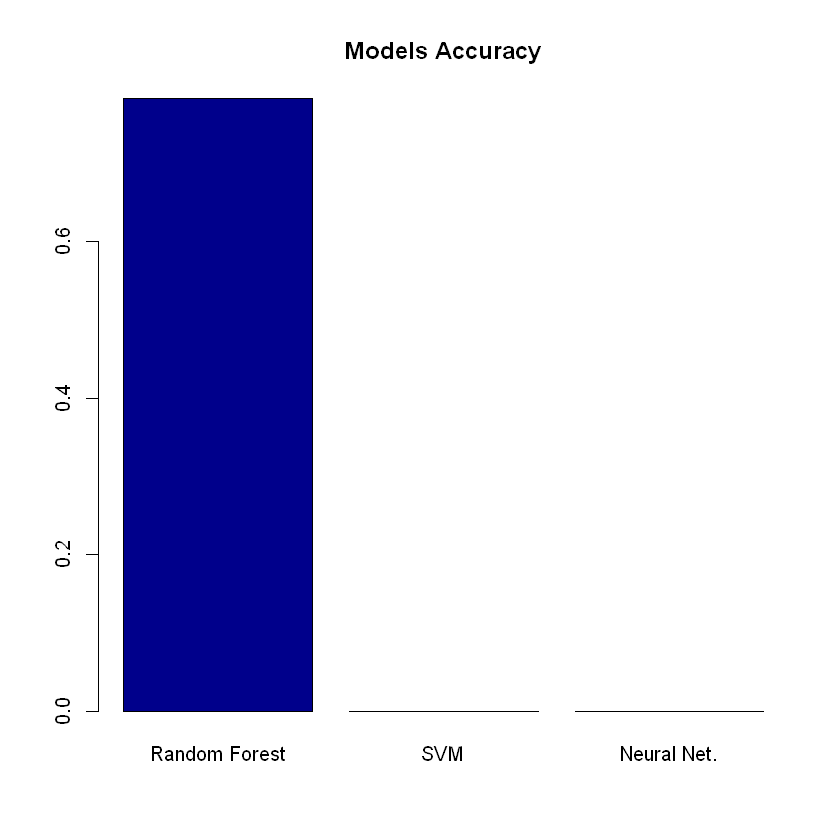

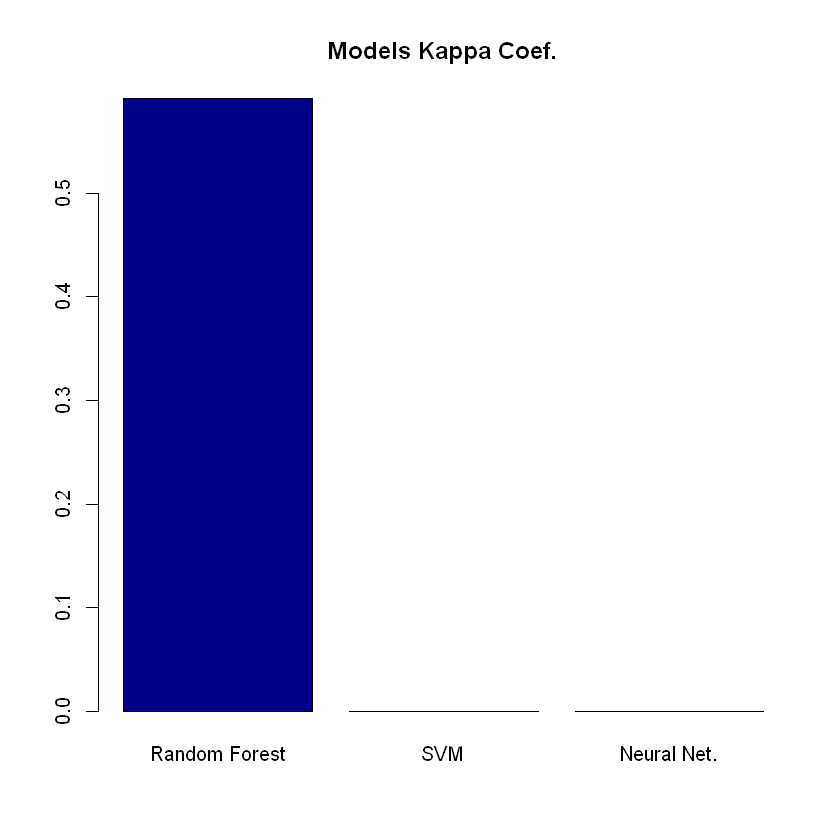

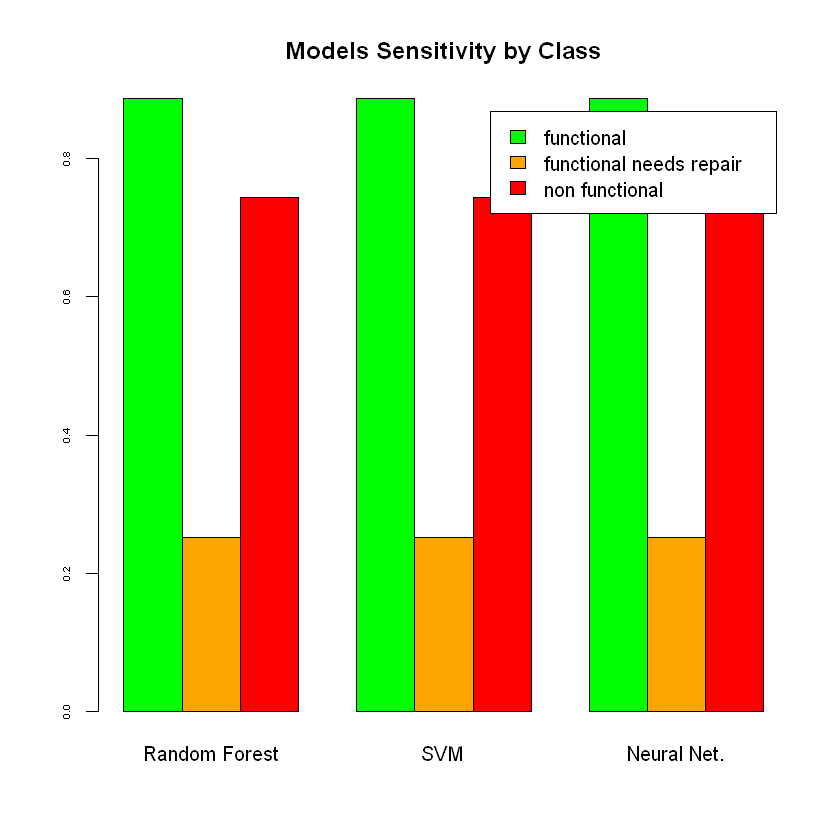

In [105]:
acTAB <-  matrix(c(acRF,acSVM,acNN),ncol=3,byrow=TRUE)
colnames(acTAB)<-c("Random Forest","SVM","Neural Net.")
barplot(as.table(acTAB),main="Models Accuracy",col=c("darkblue"))

kpTAB <-  matrix(c(kpRF,kpSVM,kpNN),ncol=3,byrow=TRUE)
colnames(kpTAB)<-c("Random Forest","SVM","Neural Net.")
barplot(as.table(kpTAB),main="Models Kappa Coef.",col=c("darkblue"))

sensTAB <-  matrix(c(sensRF,sensSVM,sensNN),ncol=3,byrow=TRUE)
rownames(sensTAB)<-c("Random Forest","SVM","Neural Net.")
colnames(sensTAB)<-c("functional","functional needs repair","non functional")

barplot(as.table(t(sensTAB)),main="Models Sensitivity by Class",beside=TRUE,col=c("green","orange","red"),legend = colnames(sensTAB))
